In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

El departamento de calidad de textiles ZARI se encuentra estudiando el efecto del tiempo de ciclo, el operador y la temperatura de ciclo en la capacidad de tinturación del algodón usado para la manufactura de camisetas tipo polo. Las telas confeccionadas se comparan con el estándar y se asigna una calificación que indica cuánto se parece o no al mismo.

In [197]:
df = pd.read_excel('data_p-1.xlsx')
df.shape

(54, 4)

In [198]:
df.head()

,operador,tiempo_ciclo,temperatura,calificacion
0,1,42.667,300,25.67
1,1,42.667,300,26.67
2,1,42.667,300,27.67
3,1,52.667,300,38.67
4,1,52.667,300,37.67


**a.** Construya un modelo lineal de primer y segundo orden. Con base en el coeficiente de determinación ¿Cuál modelo elegiría? Y ¿Por qué? Recuerde publicar ambos modelos, utilícelos para calcular los valores predichos y compararlos con los experimentales.

In [199]:
model_1 = sm.OLS(df['calificacion'], df.drop('calificacion',axis=1)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           calificacion   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     846.6
Date:                Tue, 06 Nov 2018   Prob (F-statistic):           1.81e-43
Time:                        00:41:34   Log-Likelihood:                -160.95
No. Observations:                  54   AIC:                             327.9
Df Residuals:                      51   BIC:                             333.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
operador         1.5864      0.806      1.968      0.055      -0.032       3.205
tiempo_ciclo     0.0492      0.074      0.670      0.506      -0.098       0.197
temperatura      0.0855      0.013      6.773      0.000       0.060       0.111
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   0.791
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.750
Skew:                          -0.124   Prob(JB):                        0.687
Kurtosis:                       2.479   Cond. No.                         399.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
model_2 = smf.ols(formula = 'calificacion ~ operador + tiempo_ciclo + temperatura',data=df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           calificacion   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.441
Date:                Tue, 06 Nov 2018   Prob (F-statistic):              0.242
Time:                        00:41:36   Log-Likelihood:                -157.97
No. Observations:                  54   AIC:                             323.9
Df Residuals:                      50   BIC:                             331.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.7459      9.409      2.417      0.019       3.847      41.645
operador         1.2728      0.781      1.629      0.110      -0.296       2.842
tiempo_ciclo    -0.0333      0.078     -0.427      0.671      -0.190       0.124
temperatura      0.0311      0.026      1.219      0.228      -0.020       0.082
==============================================================================
Omnibus:                       13.351   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                3.353
Skew:                          -0.113   Prob(JB):                        0.187
Kurtosis:                       1.800   Cond. No.                     4.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Generando dos modelos podemos ver que el primer modelo tiene un R cuadrádo de 0.98, es decir, explica el 98% de los datos, lo cual lo hace un modelo muy bueno; en cambio en el segundo caso tenemos un modelo que solo explica el 8% de los datos, lo que lo hace un modelo poco confiable

* Vamos ahora a generar las dos funciones modelos

In [203]:
f_1 = lambda x: x[0]*1.5864 + x[1]*0.0492 + x[2]*0.0855
f_2 = lambda x: x[0]*1.2728 + x[1]*(-0.0333) + x[2]*0.0311 + 22.7459

In [210]:
# Tomamos los valores de nuestro dataset y los almacenamos en arrays
x_data = df.drop(['calificacion'],axis=1).values
y_data = df['calificacion'].values
y_data.sort()
y_data

array([25.67, 25.67, 26.66, 26.67, 26.67, 26.67, 27.5 , 27.66, 27.67,
       27.67, 28.5 , 28.66, 28.66, 28.67, 29.5 , 29.66, 29.67, 30.66,
       30.67, 30.67, 31.66, 31.67, 31.67, 33.66, 33.66, 34.66, 35.5 ,
       35.5 , 35.5 , 35.5 , 35.66, 36.5 , 36.5 , 36.5 , 36.66, 36.66,
       36.66, 37.5 , 37.5 , 37.5 , 37.66, 37.67, 37.67, 38.5 , 38.66,
       38.66, 38.67, 38.67, 39.5 , 39.5 , 39.5 , 39.67, 40.5 , 41.66])

In [211]:
#Tomamos los valores predichos por nuestro primer modelo
predicho_model_1 = np.array([f_1(x) for x in x_data])

In [212]:
#Tomamos los valores predichos por nuestro segundo modelo
predicho_model_2 = np.array([f_2(x) for x in x_data])

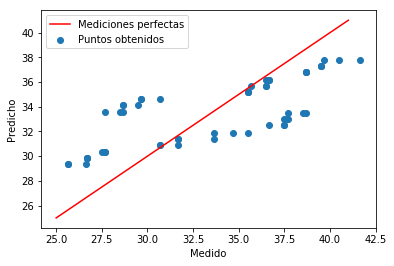

In [213]:
#Gráficas de medido vs predicho para el model_1
plt.scatter(y_data,predicho_model_1)
plt.plot(list(range(25,42)),list(range(25,42)), color='red')
plt.xlabel('Medido')
plt.ylabel('Predicho')
plt.legend(['Mediciones perfectas','Puntos obtenidos'])

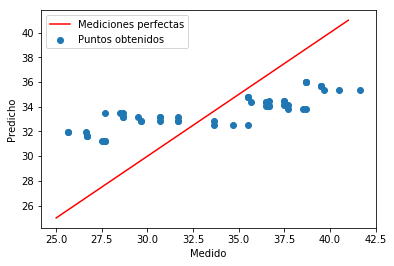

In [214]:
#Gráficas de medido vs predicho para el model_2
plt.scatter(y_data,predicho_model_2)
plt.plot(list(range(25,42)),list(range(25,42)), color='red')
plt.xlabel('Medido')
plt.ylabel('Predicho')
plt.legend(['Mediciones perfectas','Puntos obtenidos'])

En conclusión se debería tomar el primer modelo ya que explica mejor a los datos, y ademas porque la grafica de comparacion de predichos vs medidos:

$Cal(op,tc,temp) = 1.5864·op + 0.0492·tc + 0.0855·temp$  

------

**b.** ¿Cuáles son los factores que afectan de manera significativa la variable de respuesta?, utilice una significancia del 0.5 + i/100 (donde i es el promedio de los dos últimos dígitos de la cédula de los dos integrantes). Recuerde evaluar las interacciones , concluir extensamente y plantear las pruebas de hipótesis que tenga a lugar.

$significancia = 0.5 + \frac{2.66}{100}$  
$significancia = 0.5266$ 

In [215]:
# Creamos una comparación múltiple y realizamos el Tukey Test para la Temperatura
mc = MultiComparison(df['calificacion'].values , df['temperatura'])# 
print(mc.tukeyhsd())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
 300    350    2.5548  0.0368 5.0728  True 
-------------------------------------------


Con este test podemos determinar que se debe rechazar $H_0 : \mu_{300} = \mu_{350}$  
Es decir, los dos resultados tienen efectos significativos tomando diferentes temperaturas

In [216]:
# Creamos una comparación múltiple y realizamos el Tukey Test para la Tiempo de Ciclo
mc = MultiComparison(df['calificacion'].values , df['tiempo_ciclo'])# 
print(mc.tukeyhsd())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
42.667 52.667  0.7689  -3.0731 4.6109 False 
42.667 62.667  1.8406  -2.0015 5.6826 False 
52.667 62.667  1.0717  -2.7704 4.9137 False 
--------------------------------------------


En este caso los resultados no dependen del tiempo de ciclo, ya que los efectos sobre la salida son iguales para cualquier tiempo de ciclo

In [217]:
# Creamos una comparación múltiple y realizamos el Tukey Test para la Operador
mc = MultiComparison(df['calificacion'].values , df['operador'])# 
print(mc.tukeyhsd())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower   upper  reject
--------------------------------------------
  1      2     6.4617  5.1159  7.8075  True 
  1      3    10.7311  9.3853 12.0769  True 
  2      3     4.2694  2.9236  5.6152  True 
--------------------------------------------


Este test nos arroja datos interesantes, nos dice que debemos rechazar las hipotesis de que los trabajadores tienen los mismos efectos sobre la salida; es decir, la calificación tiene una fuerte dependencia del trabajador que realice el artículo evaluado, los tratamientos son diferentes para cada trabajador

--------

**d.** Para cada uno de los factores individuales publique los resultados utilizando diagramas de cajas y bigotes + grupos homogéneos a partir del test de Tukey con un 95% de confianza ¿Qué puede decir al respecto?

In [218]:
# Agrupamos nuestro DataFrame por Operador
g_o=df.groupby('operador')
calificacion_t1 = g_o.get_group(1)['calificacion']
calificacion_t2 = g_o.get_group(2)['calificacion']
calificacion_t3 = g_o.get_group(3)['calificacion']

Text(0, 0.5, 'Calificacion')

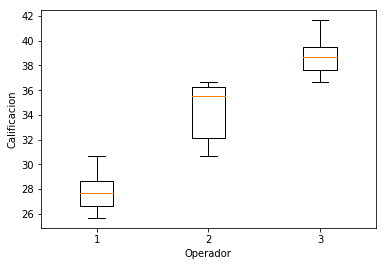

In [219]:
# Mostramos un diagrama de cajas para visualizar los efectos del Operador sobre la calificacion final
plt.boxplot([calificacion_t1,calificacion_t2,calificacion_t3])
plt.xlabel('Operador')
plt.ylabel('Calificacion')

In [220]:
# Agrupamos nuestro DataFrame por Tiempo de Ciclo
g_tc=df.groupby('tiempo_ciclo')
calificacion_tc1 = g_tc.get_group(42.667)['calificacion']
calificacion_tc2 = g_tc.get_group(52.667)['calificacion']
calificacion_tc3 = g_tc.get_group(62.667)['calificacion']

Text(0, 0.5, 'Calificacion')

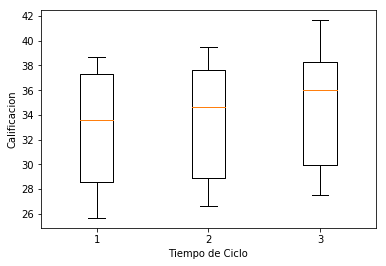

In [221]:
# Mostramos un diagrama de cajas para visualizar los efectos del Tiempo de Ciclo sobre la calificacion final
plt.boxplot([calificacion_tc1,calificacion_tc2,calificacion_tc3])
plt.xlabel('Tiempo de Ciclo')
plt.ylabel('Calificacion')

In [222]:
# Agrupamos nuestro DataFrame por Temperatura
g_t=df.groupby('temperatura')
calificacion_t1 = g_t.get_group(300)['calificacion']
calificacion_t2 = g_t.get_group(350)['calificacion']

Text(0, 0.5, 'Calificacion')

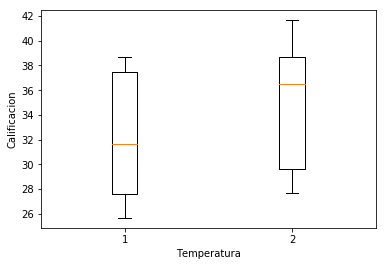

In [223]:
# Mostramos un diagrama de cajas para visualizar los efectos del Tiempo de Ciclo sobre la calificacion final
plt.boxplot([calificacion_t1,calificacion_t2])
plt.xlabel('Temperatura')
plt.ylabel('Calificacion')

En conclusión, la variable que tienen efectos significativos sobre la calificación, es el trabajador, en los demas grupos no hay una evidencia estadistica significativa para determinar si se tiene efectos sobre la calificación